# Machine Learning Housing Corporation Project

- **Goal**: Model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

## 2. Get the data
### 2.1. Read the data & inital exploration

In [1]:
#Import necessary modules
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
path_name = "./data/housing.csv"
housing = pd.read_csv(path_name)
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 20,640 instances in the dataset.
- There are some missing value in `total_bedrooms` attribute.
- All attributes are numerical, except the `ocean_proximity` field. Its type is object. We will need to
  encoding this attributes later.


In [4]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

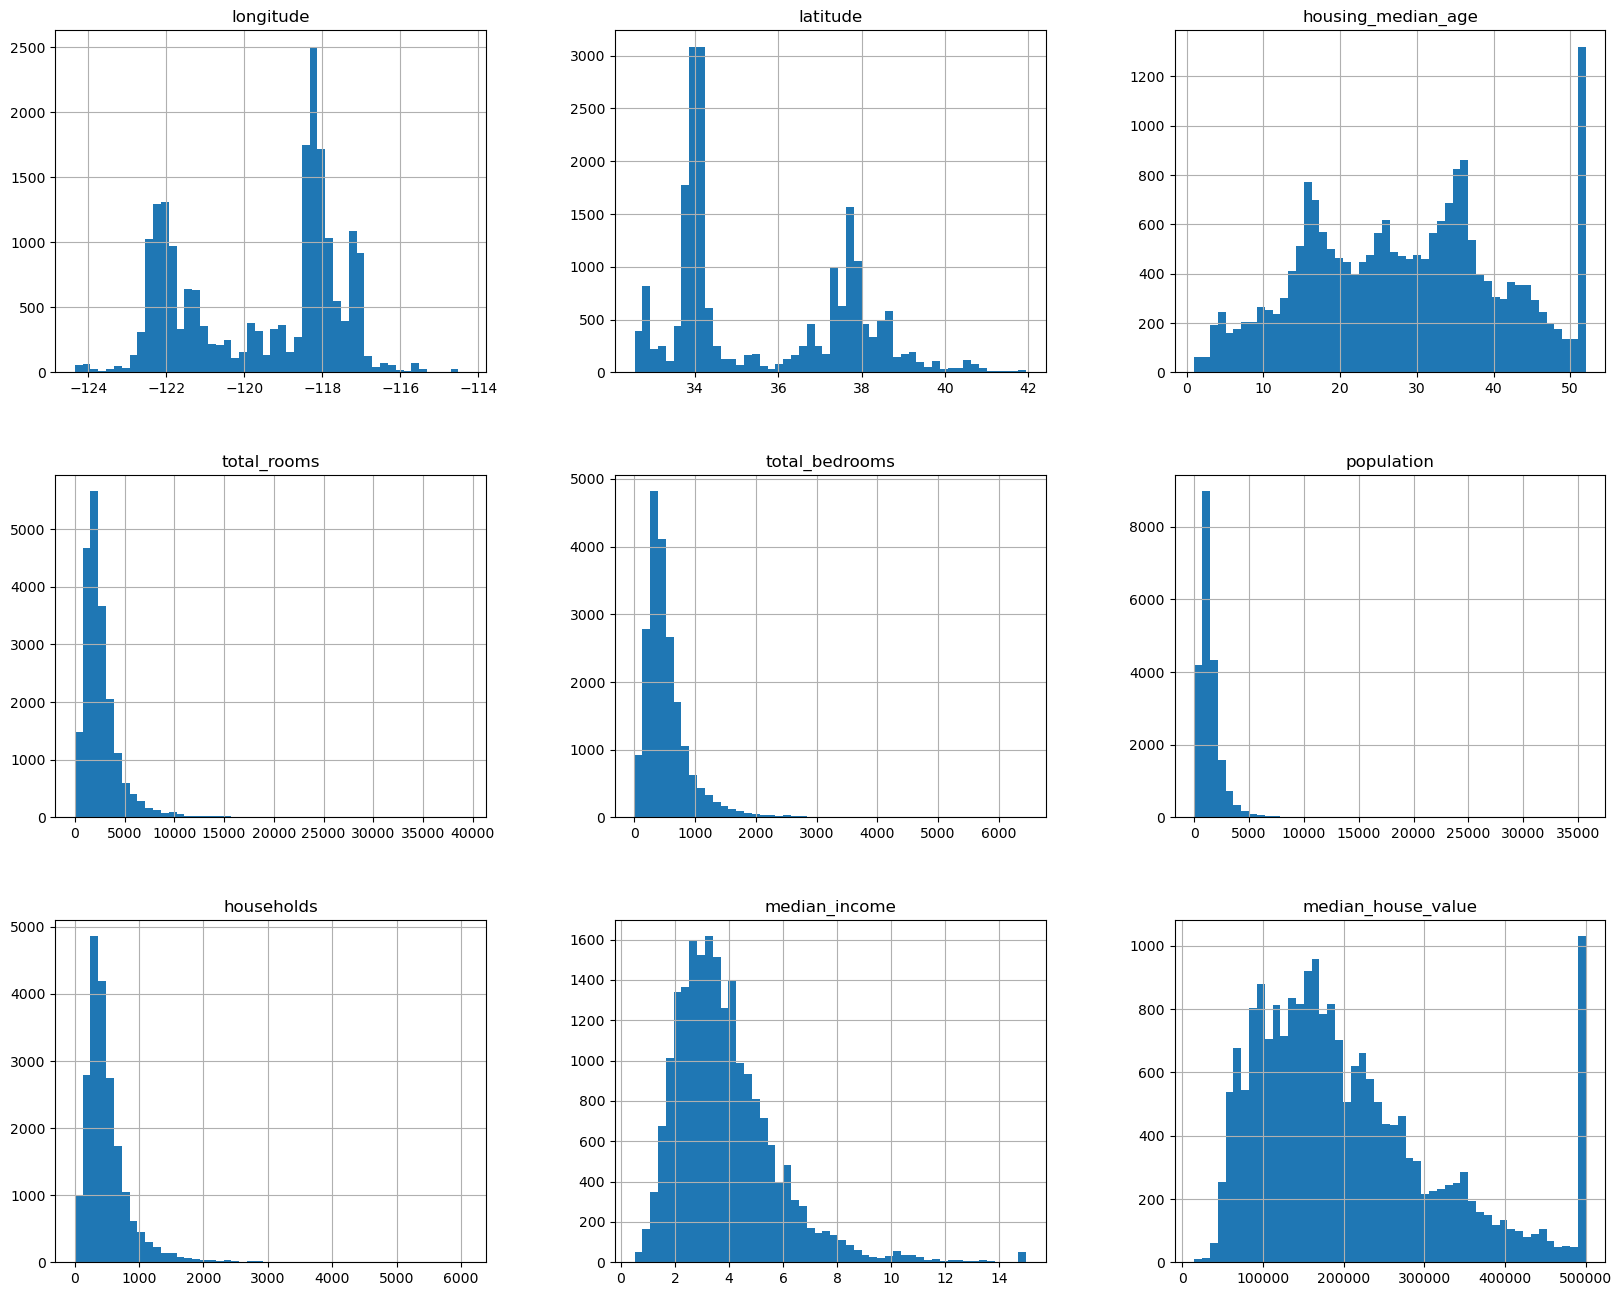

In [6]:
housing.hist(bins=50, figsize=(20,16)); # ';' to remove the detailed props

### 2.1. Create a Test Set
- Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset, and set them aside:



In [7]:
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- Median income is a very important attribute to predict `median housing` prices. 
- We may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute. 

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

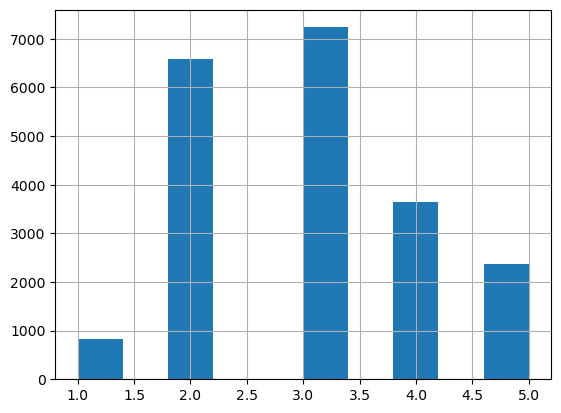

In [9]:
housing["income_cat"].hist();

- Using Scikit-Learn’s `StratifiedShuffleSplit` class to do stratified sampling based on the `income_cat`

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

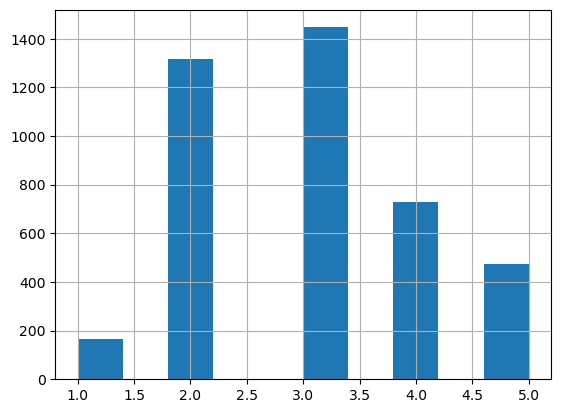

In [11]:
strat_test_set["income_cat"].hist();

In [12]:
strat_train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   

      ocean_proximity income_cat  
12655          INLAND          2  
15502      NEAR OCEAN          5  
2908           INLAND          2  
14053      NEAR OCEAN          2  
20496       <1H OCEAN          3

In [13]:
# removing the `income_cat` attribute so the data is back to its original state

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 3. Explore the data to gain insights.


In [14]:
housing = strat_train_set.copy()

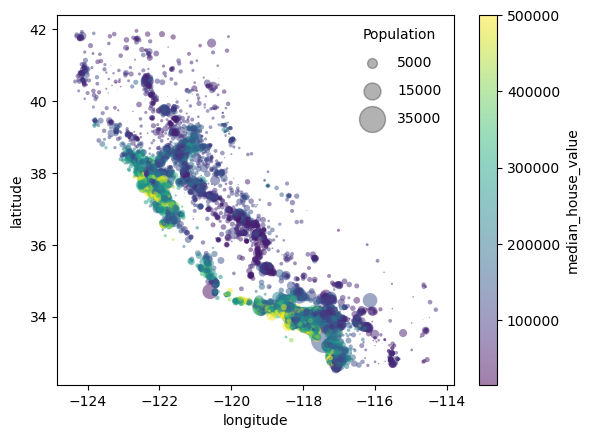

In [15]:
# Extract the data we're interested in - Longd = Kinh độ, Latd: Vĩ   
lat, lon = housing['latitude'], housing['longitude']
population, house_value = housing['population'], housing['median_house_value']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c= house_value, cmap='viridis',
            s=population/100, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='median_house_value')

# Here we create a legend:
# we'll plot empty lists with the desired size and label
#population.sort_values()
# 5342         3.0
# 14822        8.0
# 3125         8.0
# 12286        8.0
# 19389        9.0
#           ...   
# 6066     15037.0
# 6057     15507.0
# 10309    16122.0
# 13139    16305.0
# 15360    35682.0
# Name: population, Length: 16512, dtype: float64

for pop in [5000, 15000, 35000]:
    plt.scatter([], [], c='k', alpha=0.3, s=pop/100,
                label=str(pop))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Population')


### 3.2. Looking for Correlations


In [16]:
#corr()
housing_drop_ocean = housing.drop('ocean_proximity', axis = 1)
housing_corr = housing_drop_ocean.corr() #Get correlation data
housing_corr


longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

In [17]:
# ones_like can build a matrix of booleans (True, False) with the same shape as our data
ones_corr = np.ones_like(housing_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [18]:
# np's triu: return only upper triangle matrix
mask = np.triu(ones_corr)
mask
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [19]:
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [20]:
adjusted_housing_corr = housing_corr.iloc[1:, :-1]

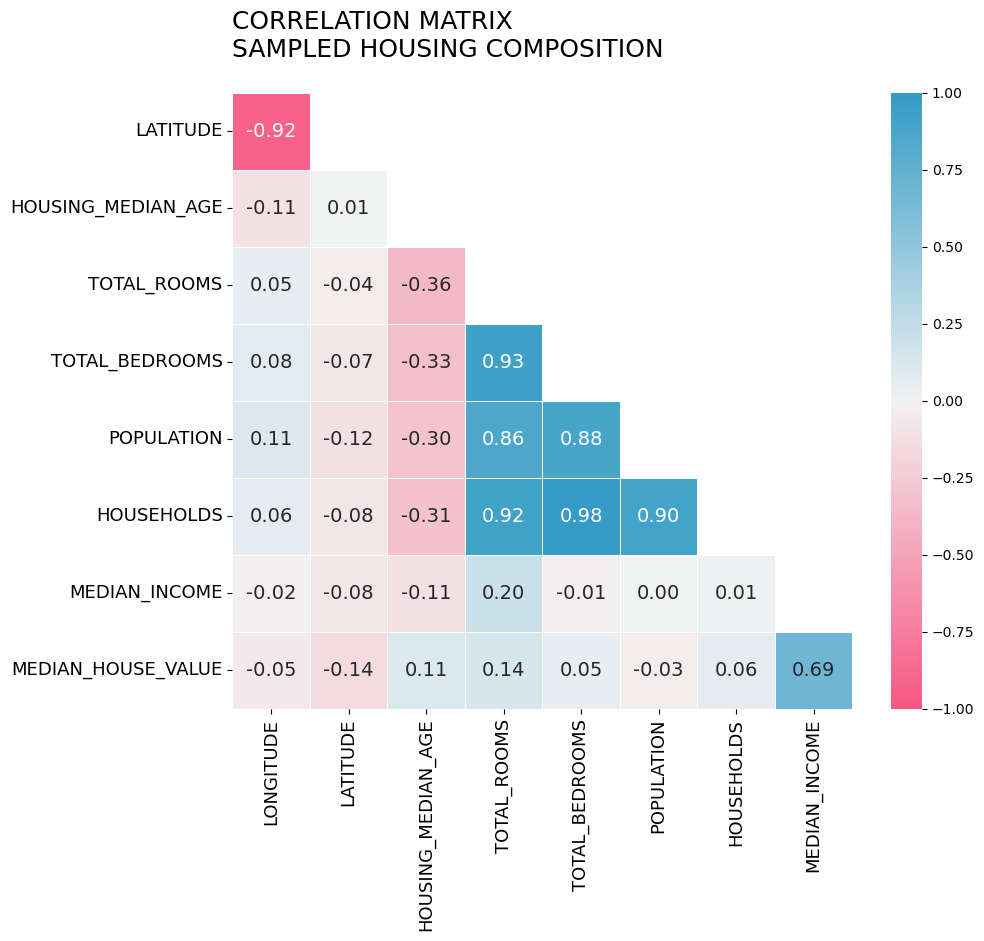

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

#That method uses HUSL colors, so you need hue, saturation, and lightness. 
#I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_housing_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":14}, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_housing_corr.index]
xticks = [i.upper() for i in adjusted_housing_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\nSAMPLED HOUSING COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18);

# 4. Prepare the Data for Machine Learning Algorithms

## 4.1. Data Cleaning

### 4.1.1. Handling Missing Values

In [56]:
X_train = strat_train_set.drop("median_house_value", axis=1).values
y_train = strat_train_set["median_house_value"].copy().values

In [57]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Since the median can only be computed on numerical attributes, 
#we need to create a copy of the data without the text attribute ocean_proximity

X_train[:,:-1] = imputer.fit_transform(X_train[:,:-1])

In [58]:
X_train.shape

(16512, 9)

### 4.1.2. Handling Text and Categorical Attributes

In [41]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#transformers: specify what kind of transformation, and which cols
#Tuple ('encoder' encoding transformation, instance of Class OneHotEncoder, [col to transform])
#remainder ="passthrough" > to keep the cols which not be transformed. Otherwise, the remaining cols will not be included 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])] , remainder="passthrough" )
#fit and transform with input = X
#np.array: need to convert output of fit_transform() from matrix to np.array
X_train = np.array(ct.fit_transform(X_train))

In [61]:
X_train[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, -121.46, 38.52, 29.0, 3873.0, 797.0,
       2237.0, 706.0, 2.1736], dtype=object)

## 4.2. Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,5:] = sc.fit_transform(X_train[:,5:])

# 5. Select and Train a Model
## 5.1. Training and Evaluating on the Training Set

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()